# TOTVS LABS DATA CHALLANGE

I have organized this notebook in the following way:

 1. __Exploratory Data Analysis__: First, I will do a brief data exploration to get a better understanding of the data I am working with
 
 
 2. __Ideas__: Then, I will move on to answering Question 1 of the challange, which is to propose insightful ideas on how to use this data  __(Question 1)__
 
 
 3. __Usefulness__: Having proposed enough ideas, I will choose one and explain how it can improve the business, which is Question 2 of the challange __(Question 2)__
 
 
 4. __Execution__: I will then implement the idea I chose on the previous step to the best of my abilities __(Question 3)__
 
 
 5. __Improvement__: Finally, I will explain the design choices I've made and propose improvement that could be done, if I had more time __(Question 4)__

## Importing and Manipulating the Data

In [83]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Loading the data...

In [4]:
data = pd.read_json('/Users/guilhermeperticarari/Downloads/challenge.json')

Converting *register_date* to pandas' datetime object and creating additional date metrics

In [5]:
data['register_date'] = data.register_date.apply(pd.to_datetime)
data['register_month'] = data.register_date.apply(lambda date: date.month)
data['register_year'] = data.register_date.apply(lambda date: date.year)
data['register_year_week'] = data.register_date.apply(lambda date: str(date.year)+'/'+str(date.week))
data['is_weekend'] = data.register_date.apply(lambda date: True if date.weekday() in [4,5,6] else False)

Checking for missing data on the dataset. The only data that seems to be missing is 'is_churn' information, which displays 1915 NaN entries.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 18 columns):
branch_id             204428 non-null int64
customer_code         204428 non-null int64
group_code            204428 non-null int64
is_churn              202513 non-null float64
item_code             204428 non-null int64
item_total_price      204428 non-null float64
order_id              204428 non-null int64
quantity              204428 non-null int64
register_date         204428 non-null datetime64[ns]
sales_channel         204428 non-null int64
segment_code          204428 non-null int64
seller_code           204428 non-null int64
total_price           204428 non-null float64
unit_price            204428 non-null float64
register_month        204428 non-null int64
register_year         204428 non-null int64
register_year_week    204428 non-null object
is_weekend            204428 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(4), int64(11), object(1)
memory usag

## 2. Exploratory Data Analysis

Before analysing overall KPIs, I will spend a little time checking the data in order to better understanding it better

### Structure of the Orders

The orders seems to be broken down in such a way that, each line represents a unique item. For example, in order_id=100 there 12 different items (therefore, 12 rows), and each row brings that item's price and quantity. 
 - *total_price* stays the same for all 12 rows, since it is the orders' total price
 - *customer_code* and *seller_code* stays the same for all 12 rows 
 - *item_total_price* is not only *quantity* x *unit_price*, because taxes or discounts are counted 
in

In [7]:
order_id_aux = 13975
data['item_total_price_pre_taxes'] = data['unit_price']*data['quantity']
data['taxes_pct'] =np.round(100*(data['item_total_price'] - data['item_total_price_pre_taxes'] )/data['item_total_price_pre_taxes']) 
data[data.order_id==order_id_aux]

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,register_month,register_year,register_year_week,is_weekend,item_total_price_pre_taxes,taxes_pct
10325,0,455,0,0.0,1412,162.91,13975,3,2015-02-11,0,0,137,2528.01,141.60,2,2015,2015/7,False,424.80,-62.0
45258,0,455,0,0.0,999,170.67,13975,3,2015-02-11,0,0,137,2528.01,148.35,2,2015,2015/7,False,445.05,-62.0
45823,0,455,0,0.0,1045,159.10,13975,6,2015-02-11,0,0,137,2528.01,138.30,2,2015,2015/7,False,829.80,-81.0
68000,0,455,0,0.0,1222,260.09,13975,3,2015-02-11,0,0,137,2528.01,226.08,2,2015,2015/7,False,678.24,-62.0
69492,0,455,0,0.0,997,279.97,13975,6,2015-02-11,0,0,137,2528.01,243.36,2,2015,2015/7,False,1460.16,-81.0
88143,0,455,0,0.0,1404,267.27,13975,6,2015-02-11,0,0,137,2528.01,232.32,2,2015,2015/7,False,1393.92,-81.0
93242,0,455,0,0.0,1411,162.91,13975,3,2015-02-11,0,0,137,2528.01,141.60,2,2015,2015/7,False,424.80,-62.0
111904,0,455,0,0.0,998,170.67,13975,3,2015-02-11,0,0,137,2528.01,148.35,2,2015,2015/7,False,445.05,-62.0
128084,0,455,0,0.0,1223,295.53,13975,3,2015-02-11,0,0,137,2528.01,256.89,2,2015,2015/7,False,770.67,-62.0
130397,0,455,0,0.0,246,105.89,13975,6,2015-02-11,0,0,137,2528.01,92.04,2,2015,2015/7,False,552.24,-81.0


In [486]:
print('First registered date: ',data.register_date.min())
print('Last registered date: ',data.register_date.max())
print()
print('Different items:',data.item_code.nunique())
print('Different sales channes:',data.sales_channel.nunique())
print('Different customers:',data.customer_code.nunique())
print('Different sellers:',data.seller_code.nunique())
print('Different branches:',data.branch_id.nunique())
print('Different groups:',data.group_code.nunique())
for group_code in data.group_code.unique():
    print(' - There are ' + str(data[data.group_code==group_code].customer_code.nunique()) + ' different customers in group ' + str(group_code))
print()

First registered date:  2008-01-04 00:00:00
Last registered date:  2018-07-08 00:00:00

Different items: 2981
Different sales channes: 106
Different customers: 838
Different sellers: 290
Different branches: 1
Different groups: 4
 - There are 794 different customers in group 0
 - There are 9 different customers in group 2
 - There are 15 different customers in group 1
 - There are 20 different customers in group 3



### 2.  Ideas

So far, from what I gathered from the data, I have come up with the following ideas:

1. A Customer Lifetime Value model that tries to estimate how much revenue a given customer will bring to the company in the future


2. A forecasting model to estimate what the company's demand is going to be like in the future


3. A clustering model that fits customers into a specified number of clusters regarding their shopping behavior (frequency, types of products purchased) so that the company's communication with said cluster can be more targetted 


4. A churning prediction model, which tries to predict wheter a given customer had churned or not. The right model can even estimate the probability of churning.


5. An analysis of sellers' performance so that we can find which ones should be trained and which ones should get a reward for performance


6. An analysis of sales channels so we can find out how to better structure our sales strategy

### 3. Usefulness

From the ideas I have proposed in the previous step, I will now describe how the one that I found to be the most important one can improve the business:

__Customer Lifetime Value model__: A CLV model will tell us how much revenue a given customer is expected to bring the company in the future. 

By itself, this model tells us right away which customers are worth pursuing, and even spending money on, and which are not, but the real reason I chose this model is that it can be a cornerstone for many other analysis and models. For example, with this metric, we can run an acquisition channel analysis based on CLV and find out which channels brings in the most profitable customers. For instance, we can lean on Facebook's look-alike model to find us customers that have similarities with our best customers (for digital marketing). 

Most of my other ideas would be benefited from having a CLV metric for each individual customer and, therefore, I find this model to be the most important of all for now.




### 4. Execution

Now that I have chosen the most important idea, I will go on and execute it to the best of my abilities, given the deadline and my poor understanding of the business being modeled. On a later section, I will discuss what I would have done differently had I been given more time on this step of the process.

There are many approaches to building a CLV model, which have been described in numerous academic papers. I will go with a Markov Chain model, which describe well how a customer's decision-making process takes place.

 . __Markov Chain-based Model__: This model has the underlying assumption that a customer who is active has a fixed probability of staying active, and a customer who has churned has a fixed probability of staying churned. The figure below describes well this property, called Markov property.
 
<img src="markov_example.png">

In order to estimated these fixed probabilities, I will assume a frequentist point-of-view and figure out, historically, how these proportions come into play. The states are very easily defined: a customer is active on day X if he has made a purchase on that day. Otherwise, he's considered 'churn' or 'inactive'.

#### Markov Chain-based Model

First of all, I will import a Markov Chain library that I've developed and which will facilitate all calculations for me.

In [ ]:
from markov_chains import MarkovChain

Now, I will get, for each customer, an array that describes his/her shopping behavior.

For example, if a customer has made his first and only purchase on May 1st, 2018, and today is July 1st, 2018, his activity array would be:

[1,0,0...,0,0]

But if the customer has shopped every day since his first purchase, except for today, his array would be like:

[1,1,1,...,1,0]

__Training Set__

I've chosen all data before 2017-07-08 (1 year before the last day of the original dataset) to be the training set, and the remaining data to be part of the test set. This will allow me to evaluate my model on a 1-year test set.

 . __Training__: all data before 2017-07-08
 
 . __Goal__: To predict how much  revenue customers will bring in the following 365 days 
 
 . __Evaluation__: the predicted value will be compared to the real value so I can evaluate the model

In [488]:
def make_base(date_init, date_end):
    date_init = pd.to_datetime(date_init)
    date_end = pd.to_datetime(date_end)
    dates =[]
    delta = date_end - date_init
    for day in range(delta.days):
        date_curr = date_init + datetime.timedelta(days=day)
        dates.append(date_curr)
    return dates

In [459]:
#Gathering the training data

data_train = data[data.register_date<='2017-07-08']
activity_array_train = {'customer':[], 
                        'dates':[],
                        'active_days':[],
                        'total_days':[],
                        'current_value':[],
                        'avg_spending':[]}

# Assumed to be today's date
date_end = data_train.register_date.max()

n_customers = data_train.customer_code.nunique()
analyzed_customers=1

for customer in sorted(data_train.customer_code.unique()):
    if analyzed_customers % 100 == 0:
        print(str(analyzed_customers) + ' customers analyzed out of ' + str(n_customers))
    analyzed_customers+=1
    
    #Order dates for the customer
    order_dates = data_train[data_train.customer_code==customer].groupby('register_date').item_total_price.sum().reset_index().sort_values(by='register_date') 
    reg_dates = pd.to_datetime(order_dates.register_date.values)
    
    #Date of first purchase
    date_init = order_dates.register_date.iloc[0]
    
    #Array with all days from his first purchase until today
    base = make_base(date_init, date_end)
    active_dates = base.copy()
    money_spent = base.copy()
    
    for i, date in enumerate(base):
        if date in reg_dates:
            active_dates[i] = 1
            money_spent[i] = order_dates[order_dates.register_date==date].item_total_price.values[0]
        else:
            active_dates[i] = 0
            money_spent[i] = 0
    activity_array_train['customer'].append(customer)
    activity_array_train['dates'].append(active_dates)
    activity_array_train['active_days'].append(np.sum(active_dates))
    activity_array_train['total_days'].append(len(base))
    activity_array_train['current_value'].append(np.sum(money_spent))
    activity_array_train['avg_spending'].append(np.sum(money_spent)/np.sum(active_dates))

100 customers analyzed out of 785
200 customers analyzed out of 785
300 customers analyzed out of 785
400 customers analyzed out of 785
500 customers analyzed out of 785
600 customers analyzed out of 785
700 customers analyzed out of 785


In [481]:
#Testing the data

activity_train_df = pd.DataFrame(activity_array_train)
MC = MarkovChain()

#Daily interest rate (2% annualized)
d = 0

I = np.identity(2)

n_days = 365

for customer in activity_train_df.customer.unique():
    R = [[0], [activity_train_df[activity_train_df.customer==customer].avg_spending.values[0]]]
    P = np.transpose(MC.get_one_step_matrix(activity_train_df[activity_train_df.customer==customer].dates.values[0]))
    V = np.array([[0],[0]])
    for day in range(n_days):
        V=V+np.matmul(np.transpose(((1/(1+d))*P)),R)
    activity_train_df.loc[activity_train_df.customer==customer,'predicted_365'] = V[activity_train_df[activity_train_df.customer==customer].dates.values[0][-1]][0]
    
test_data = data[data.register_date>'2017-07-08']
test_true_value = test_data.groupby('customer_code').item_total_price.sum().reset_index()

for customer in activity_train_df.customer.unique():
    true_value = test_true_value[test_true_value.customer_code==customer].item_total_price.values
    if len(true_value)==0:
        true_value = 0 
    activity_train_df.loc[activity_train_df.customer == customer,'true_365'] = true_value
    
activity_train_df['L1'] = np.abs(activity_train_df['true_365'] - activity_train_df['predicted_365'])
activity_train_df['pct_error'] =activity_train_df['predicted_365']/activity_train_df['true_365']-1

print('Top pct errors:\n')
print(activity_train_df.pct_error.sort_values(ascending=False).head(10))
print('\nBottom pct errors:\n')
print(activity_train_df.pct_error.sort_values(ascending=False).tail(10))
activity_train_df['pct_error'] = activity_train_df['pct_error'].clip(-1,21)

Top pct errors:

63           inf
173          inf
782          inf
781          inf
570          inf
479          inf
677          inf
16           inf
399          inf
266    20.662734
Name: pct_error, dtype: float64

Bottom pct errors:

709   -1.0
163   -1.0
160   -1.0
313   -1.0
319   -1.0
334   -1.0
25    -1.0
330   -1.0
326   -1.0
714    NaN
Name: pct_error, dtype: float64


Since every time the true value is 0, the percent change goes to inifinity, I've clipped the pct_change metric to be between -1 (the minimum value) and 21 (the maximum value).

median pct_error: -0.165037728394
L1 error: 5448.7143203


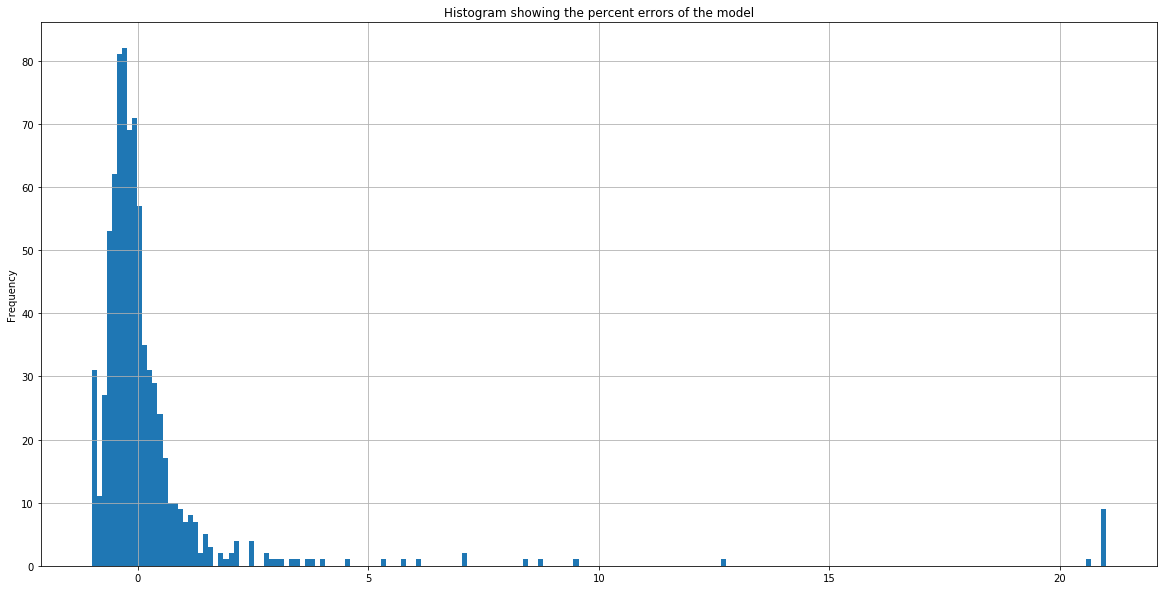

In [479]:
print('median pct_error:',activity_train_df.pct_error.describe()['50%'])
print('L1 error:', activity_train_df.L1.sum()/len(activity_train_df))

fig, ax = plt.subplots(figsize=(20,10))
activity_train_df.pct_error.plot(kind='hist', bins=200)
plt.title('Histogram showing the percent errors of the model')
plt.grid()
plt.show()

Although this model is far from perfect, it may be a good first model that can be improved over the long run. Predicting customer behavior is not an exact science and to have a median individual absolute error as low as -16% for such a simplistic model is actually not that bad.

Now, I will move on to predicting the CLV for the whole database using all of the data available for the infinite time horizon (instead of only 365 days).

In [468]:
activity_array = {'customer':[], 
                  'dates':[],
                  'active_days':[],
                  'total_days':[],
                  'current_value':[],
                  'avg_spending':[]}

# Assumed to be today's date
date_end = data.register_date.max()

n_customers = data.customer_code.nunique()
analyzed_customers=1

for customer in sorted(data.customer_code.unique()):
    if analyzed_customers % 100 == 0:
        print(str(analyzed_customers) + ' customers analyzed out of ' + str(n_customers))
    analyzed_customers+=1
    
    #Order dates for the customer
    order_dates = data[data.customer_code==customer].groupby('register_date').item_total_price.sum().reset_index().sort_values(by='register_date') 
    reg_dates = pd.to_datetime(order_dates.register_date.values)
    
    #Date of first purchase
    date_init = order_dates.register_date.iloc[0]
    
    #Array with all days from his first purchase until today
    base = make_base(date_init, date_end)
    active_dates = base.copy()
    money_spent = base.copy()
    
    for i, date in enumerate(base):
        if date in reg_dates:
            active_dates[i] = 1
            money_spent[i] = order_dates[order_dates.register_date==date].item_total_price.values[0]
        else:
            active_dates[i] = 0
            money_spent[i] = 0
    activity_array['customer'].append(customer)
    activity_array['dates'].append(active_dates)
    activity_array['active_days'].append(np.sum(active_dates))
    activity_array['total_days'].append(len(base))
    activity_array['current_value'].append(np.sum(money_spent))
    activity_array['avg_spending'].append(np.sum(money_spent)/np.sum(active_dates))

100 customers analyzed out of 838
200 customers analyzed out of 838
300 customers analyzed out of 838
400 customers analyzed out of 838
500 customers analyzed out of 838
600 customers analyzed out of 838
700 customers analyzed out of 838
800 customers analyzed out of 838


Using the Markov Chains approach, we can estimate the expected revenue over an infinite horizon using only:

P: one step matrix, given by the fixed transition probabilities
R: revenue matrix
d: one day interest rate
I: identity matrix

Using the formula:

V = [I - (1/(1+d))*P]^(-1) * R

In [484]:
activity_df = pd.DataFrame(activity_array)
MC = MarkovChain()

#Daily interest rate (2% annualized)
d = (1.02)**(1/252)-1

I = np.identity(2)

for customer in activity_df.customer.unique():
    R = [[0], [activity_df[activity_df.customer==customer].avg_spending.values[0]]]
    P = MC.get_one_step_matrix(activity_df[activity_df.customer==customer].dates.values[0])
    V = np.matmul(np.linalg.inv((I-(1+d)**(-1)*P)),R)
    activity_df.loc[activity_df.customer==customer,'CLV'] = V[activity_df[activity_df.customer==customer].dates.values[0][-1]][0]

Now, we have a CLV metric for each customer, as you can see below.

The highest CLV found is 5.443896e+07 dollars, which belongs to customer 658.
The lowest CLV found is 0 dollars, which is shared among customers 482, 359, 460 and 767, all of which have only made 1 purchase throughout their lifetime


In [485]:
print('\n-- Top 5 CLV: --\n\n',activity_df.sort_values('CLV', ascending=False).head())
print('\n\n\n-- Bottom 5 CLV --\n\n',activity_df.sort_values('CLV', ascending=False).tail())


-- Top 5 CLV: --

      customer                                              dates  active_days  \
658       658  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...          331   
235       235  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           20   
114       114  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...         1689   
391       391  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...           15   
633       633  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...         1069   

     total_days  current_value  avg_spending           CLV  
658        3295    14136687.98  42709.027130  5.443896e+07  
235         745      489589.59  24479.479500  7.944248e+06  
114        3837     1925238.11   1139.868626  6.383978e+06  
391         303      157978.04  10531.869333  6.203096e+06  
633        3316     1346730.99   1259.804481  5.164506e+06  



-- Bottom 5 CLV --

      customer                                              dates  active_days  \
176       176  [1, 0, 

In [504]:
from lifetimes.utils import calibration_and_holdout_data

summary_cal_holdout = calibration_and_holdout_data(data[['customer_code', 'register_date']], 
                                                   'customer_code', 
                                                   'register_date',
                                                    calibration_period_end='2017-07-08',
                                                    observation_period_end='2018-07-08' )   
print(summary_cal_holdout.head())

               frequency_cal  recency_cal   T_cal  frequency_holdout  \
customer_code                                                          
0                       15.0       3118.0  3210.0                3.0   
1                       38.0       3332.0  3420.0                3.0   
2                       34.0       3362.0  3455.0                4.0   
3                       58.0       3380.0  3418.0                3.0   
4                       33.0       3348.0  3423.0                1.0   

               duration_holdout  
customer_code                    
0                           365  
1                           365  
2                           365  
3                           365  
4                           365  


### 4. Improvement

If I had had the time, I would certainly focus on how to put this model intro production, which would make me wonder:

1. How long must a customer stay in our database before we can make an accurate prediction about his/her lifetime value


2. How can I optimize this code so that it can handle a large amount of data? Pandas is certainly good for research, but not so good for production


3. Is the historical average spending of a customer really the best way to estimate revenue when the customer is active? Or should it be a moving average? Or maybe another whole new model just for that, such as the Gamma-Gamma model in the Pareto/NBD model.


4. Are some customers better explained by the Markov Chain model while other are better explained by other models, such as the Pareto/NBD? Maybe an ensemble of both would make a better model than either one of them by themselves.


5. What are other models that researches have been using? Along this project, I've found a couple of papers with interesting models that are certainly worth trying.


6. What error metric would be a good summarizer of the model? Are outliers so unwanted that an L2 metric is more desirable? 

In order to answer all of these questions, a lot of research and trial-and-error with historical data would be the welcome. I've skipped many steps because of the time constraint, but they are just as important as the execution itself. 

Also, I would have make more questions regarding the data itself. It's important to know what kind of industry we are dealing with, since customer behavior for, say, drug companies are very different from fast-food or from hotels in hawaii. I've skipped almost all of EDA analysis in order to focus on the model and, had i had the time, I would certainly have spent more of it just trying to get a better sense of the data. I ended up not using some of the metrics I created, such as the 'is_weekend' metric. They could be helpful to make the Markov Model get a sense of seasonality involved with data (which, once again, is highly dependent on the kind of industry).

### References

 .Markov Chain-based model: https://web.stanford.edu/class/msande121/Links/crmmodelingmarkov.pdf
 
 Another interesting models:
 
 .Pareto/NBD-based model: https://cran.r-project.org/web/packages/BTYD/vignettes/BTYD-walkthrough.pdf
 
 .Improved Markov Chain-baed model: https://onlinelibrary.wiley.com/doi/pdf/10.1002/asmb.2053
